<p>07 de febrero de 2024</p>
<p>Universidad Autónoma de Aguascalientes</p>
<p>Departamento: Ciencias de la computación</p>
<p>Carrera: Ingeniería en Computación Inteligente</p>
<p>Maestro: Dr. Francisco Javier Luna Rosas</p>
<p>Curso: Machine learning y deep learning</p>
<p>Alumno: Antonio Muñoz Barrientos</p>
<p>Semestre Enero - junio 2024</p>

# Perceptrón IRIS

Desarrollar el perceptron para clasificar las flores setosa y versicolor según su largo de pétalo (petal length) y largo del tallo (sepal length)

In [11]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data = pd.read_csv('iris.csv', delimiter=';')
data

,s.largo,s.ancho,p.largo,p.ancho,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
# Obtener variables y extraer data solo de las flores setosa y versicolor

# Clases (setosa o versicolor)
clases = data[(data['tipo'] == 'setosa') | (data['tipo'] == 'versicolor')]

data_setosa = clases[clases['tipo'] == 'setosa']
data_versicolor = clases[clases['tipo'] == 'versicolor']
data_setosa

,s.largo,s.ancho,p.largo,p.ancho,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


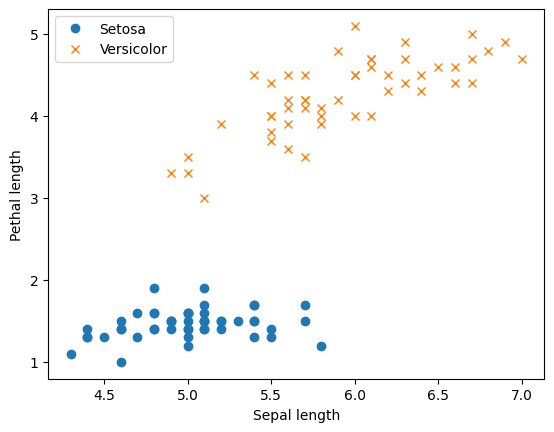

In [26]:
# Grafico de puntos para ver si son linealmente independientes
plt.plot(data_setosa['s.largo'], data_setosa['p.largo'], 'o', label="Setosa")
plt.plot(data_versicolor['s.largo'], data_versicolor['p.largo'], 'x', label="Versicolor")
plt.xlabel("Sepal length")
plt.ylabel("Pethal length")
plt.legend(loc="upper left")

In [15]:
# Obtener datos separados
# data: arreglo de medidas de flores
# clase: tipo de flor (0: setosa 1: versicolor)
data_flores = clases[['s.largo','p.largo']]
clase = clases['tipo']
print(clase)
clase = clase.apply(lambda flor: 1 if flor == 'versicolor' else 0)
print(clase)
data_flores = data_flores.to_numpy()

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
95    versicolor
96    versicolor
97    versicolor
98    versicolor
99    versicolor
Name: tipo, Length: 100, dtype: object
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: tipo, Length: 100, dtype: int64


In [16]:
# Funcion de activacion (Neurona Mc_Culloch)
#W1*X1 + W2*X2 + ... + wn*xn
def activacion(pesos:np.array,x:list,bias:int):
    z = pesos * x
    if z.sum() + bias > 0:
        return 1
    else:
        return 0

In [17]:
#prueba de activacion
pesos = np.random.uniform(-1,1,size=2)
bias = np.random.uniform(-1,1)
pesos, bias, activacion(pesos=pesos,x=[0.5,0.4],bias=bias)

(array([ 0.31953059, -0.92101189]), -0.7259505883891819, 0)

In [18]:
# Entrenamiento
# Algoritmo de perceptron
# Max epocas = 151
# tasa aprendizaje = 0.1

##Entrenamiento
pesos = np.random.uniform(-1,1,size=2)
epocas = 151
bias = np.random.uniform(-1,1)
tasa_aprendizaje = 0.1
for epoca in range(epocas):
    error_total = 0
    for i,flor in enumerate(data_flores):
        prediccion = activacion(pesos=pesos,x=flor/10,bias=bias)
        error = clase[i] - prediccion
        error_total += error**2
        pesos[0] += tasa_aprendizaje * flor[0] * error
        pesos[1] += tasa_aprendizaje * flor[1] * error
        bias += tasa_aprendizaje * error
    print(error_total,end=" ")

# Prueba
pesos, bias, activacion(pesos=pesos, x=[0.49,0.14],bias=bias) #Esperado: 0
    

1 2 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

(array([-0.27051834,  0.89233174]), -0.1243775444365213, 0)

In [19]:
# Evaluación del algoritmo
# Clases:
#### 0: setosa
#### 1: versicolor

# 4.9;2.4;3.3;1.
print(pesos, bias, "Resultado: ",activacion(pesos=pesos, x=[0.49,0.33],bias=bias)) #Esperado: 1
print(pesos, bias, "Resultado: ",activacion(pesos=pesos, x=[0.49,0.14],bias=bias)) #Esperado: 0
print(pesos, bias, "Resultado: ",activacion(pesos=pesos, x=[0.63,0.49],bias=bias)) #Esperado: 1


[-0.27051834  0.89233174] -0.1243775444365213 Resultado:  1
[-0.27051834  0.89233174] -0.1243775444365213 Resultado:  0
[-0.27051834  0.89233174] -0.1243775444365213 Resultado:  1


## Conclusiones

<p>Gracias a que el problema es linealmente separable podemos hacer uso de la Neurona de McCulloch y de un perceptrón para generar un modelo que sea capaz de identificar el tipo de flor dado el largo de su tallo y de su pétalo. Tuvimos que convertir las clases (los tipos de flor) a clases númericas (0 y 1) para poder abordar el problema.</p>

<p>Se concluye que el modelo se pudo entrenar eficazmente y en la evaluación tuvo los resultados esperados.</p>